In [213]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [214]:
data=pd.read_csv('medical_cost_insurance.csv')

In [215]:
print('Data Shape:',data.shape)

Data Shape: (1338, 7)


In [216]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [217]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\kulsr\AppData\Local\Temp\ipykernel_11644\3623945996.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=data, x='charges',fill=True,  palette='Set2')


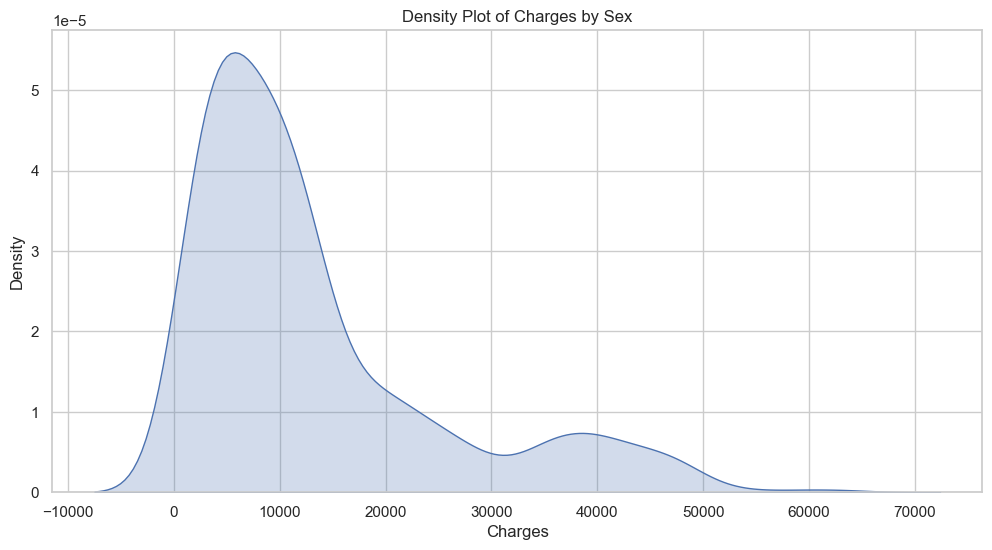

In [218]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data=data, x='charges',fill=True,  palette='Set2')
plt.title('Density Plot of Charges by Sex')
plt.xlabel('Charges')
plt.ylabel('Density')
plt.grid(True)
plt.show()

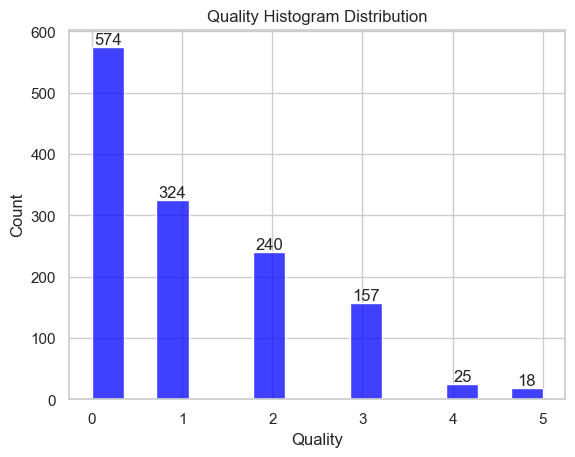

In [219]:
ax = sns.histplot(x=data['children'], color='blue')
labels = [str(v) if v else '' for v in ax.containers[0].datavalues]
ax.bar_label(ax.containers[0], labels=labels)
plt.xlabel('Quality')
plt.title('Quality Histogram Distribution')
plt.show()

In [220]:
# when we have a more no of insurance are less

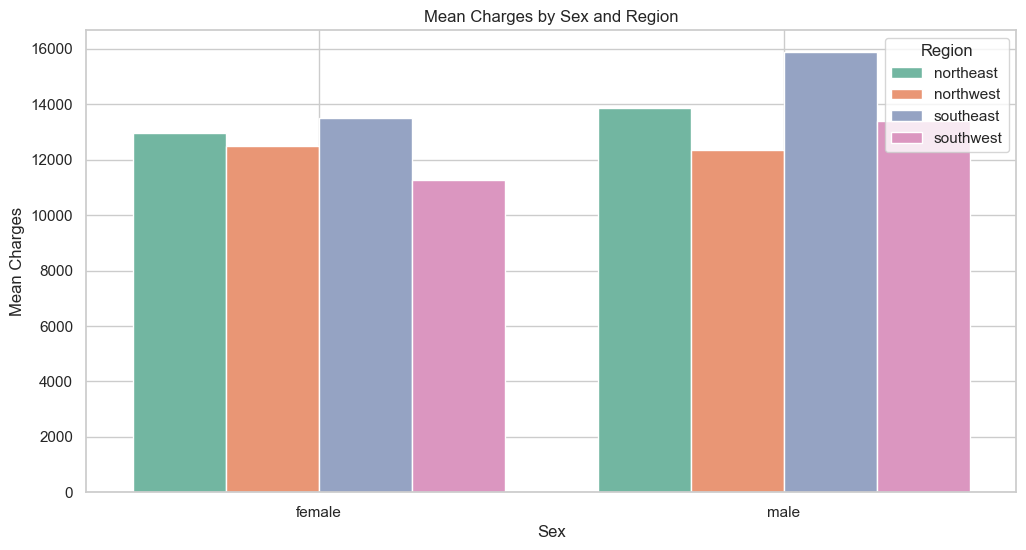

In [221]:
mean_charges = data.groupby(['sex', 'region'])['charges'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=mean_charges, x='sex', y='charges', hue='region', palette='Set2')
plt.title('Mean Charges by Sex and Region')
plt.xlabel('Sex')
plt.ylabel('Mean Charges')
plt.legend(title='Region')
plt.grid(True)
plt.show()

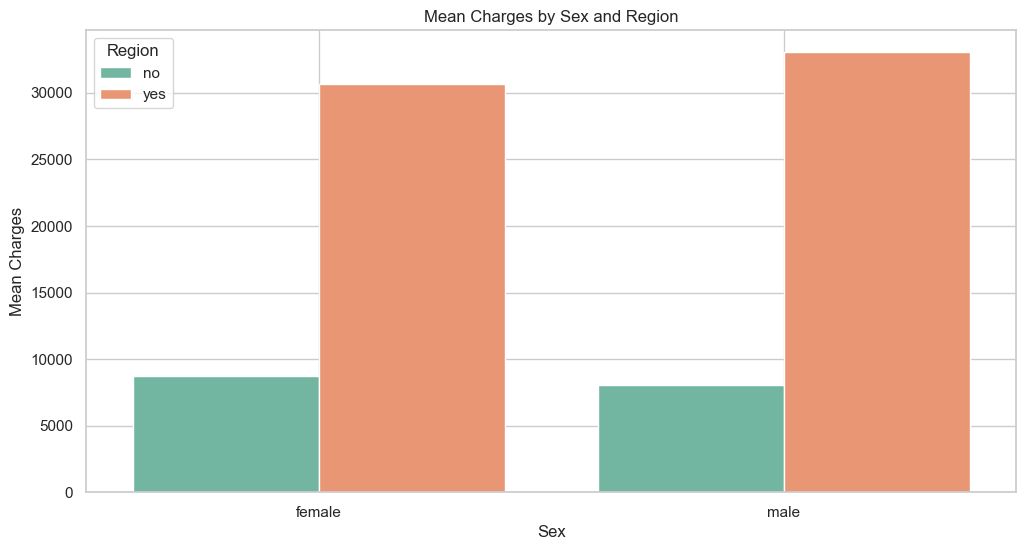

In [198]:
mean_charges = data.groupby(['sex', 'smoker'])['charges'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=mean_charges, x='sex', y='charges', hue='smoker', palette='Set2')
plt.title('Mean Charges by Sex and Region')
plt.xlabel('Sex')
plt.ylabel('Mean Charges')
plt.legend(title='Region')
plt.grid(True)
plt.show()

In [222]:
label_encoder_sex= preprocessing.LabelEncoder() 
label_encoder_smoker= preprocessing.LabelEncoder() 
label_encoder_region= preprocessing.LabelEncoder() 

# Encode labels in column 'species'. 
data['sex']= label_encoder_sex.fit_transform(data['sex']) 
data['region']= label_encoder_region.fit_transform(data['region']) 
data['smoker']= label_encoder_smoker.fit_transform(data['smoker']) 



## outlier detection

In [223]:
print('Data before Outlier Detection ',data.shape)
Q1 = data['charges'].quantile(0.25)
Q3 = data['charges'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
data = data[(data['charges'] >= lower_bound) & (data['charges'] <= upper_bound)]
print('Data After Outlier Detection ',data.shape)


Data before Outlier Detection  (1338, 7)
Data After Outlier Detection  (1199, 7)


## Feature Selection

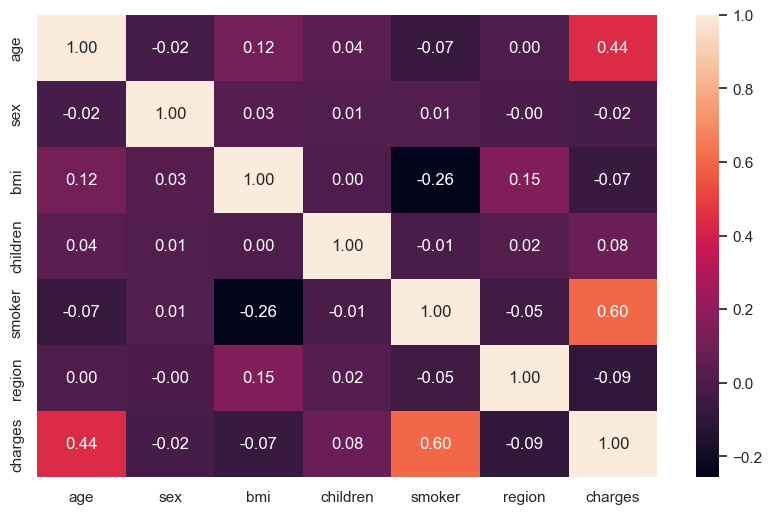

In [224]:
plt.figure(figsize=(10,6))
ax = sns.heatmap(data=data.corr(), annot=True, fmt='.2f')

In [225]:
# drop sex and region 
# data=data.drop(columns=['sex_male', 'region_northwest', 'region_southeast'],axis=1)

## Data Preprocessing

In [226]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [227]:
data.duplicated().sum()

1

In [228]:
data = data.drop_duplicates()
data.duplicated().sum()

0

In [237]:
X = data.drop('charges', axis = 1)
y = data['charges']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=17)

In [238]:
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Convert scaled data back to DataFrame for inspection
# X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
# X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

## Taining a Model

In [239]:
def plot_results(test, pred, model_name):
    fig, ax = plt.subplots(figsize=(15, 4))
    x_axis = np.arange(0, test.shape[0], 1)
    sns.lineplot(y=test, x=x_axis, label='Actual', color='mediumblue')
    sns.lineplot(y=pred, x=x_axis, label='Predicted', color='red')
    ax.set(xlabel="Values", ylabel="Target", title=f"{model_name}_Actual_vs_Prediction")
    ax.legend()
    sns.despine()
    plt.show()

In [240]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluation_fn(best_model, X_test_scaled, Y_test, model_name, save_plot=False):
    # Evaluate the model on the test set
    y_pred = best_model.predict(X_test_scaled)
    
    # Calculate regression metrics
    mae = mean_absolute_error(Y_test, y_pred)
    mse = mean_squared_error(Y_test, y_pred)
    rmse = mean_squared_error(Y_test, y_pred, squared=False)
    r2 = r2_score(Y_test, y_pred)
    
    print(f'Mean Absolute Error (MAE): {mae:.2f}')
    print(f'Mean Squared Error (MSE): {mse:.2f}')
    print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
    print(f'R-squared (R²): {r2:.2f}')
    
    # Call plotting functions
    plot_results(Y_test, y_pred, model_name)

C:\Users\kulsr\anaconda3\envs\xgboost\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Mean Absolute Error (MAE): 2732.81
Mean Squared Error (MSE): 25714851.59
Root Mean Squared Error (RMSE): 5070.98
R-squared (R²): 0.56


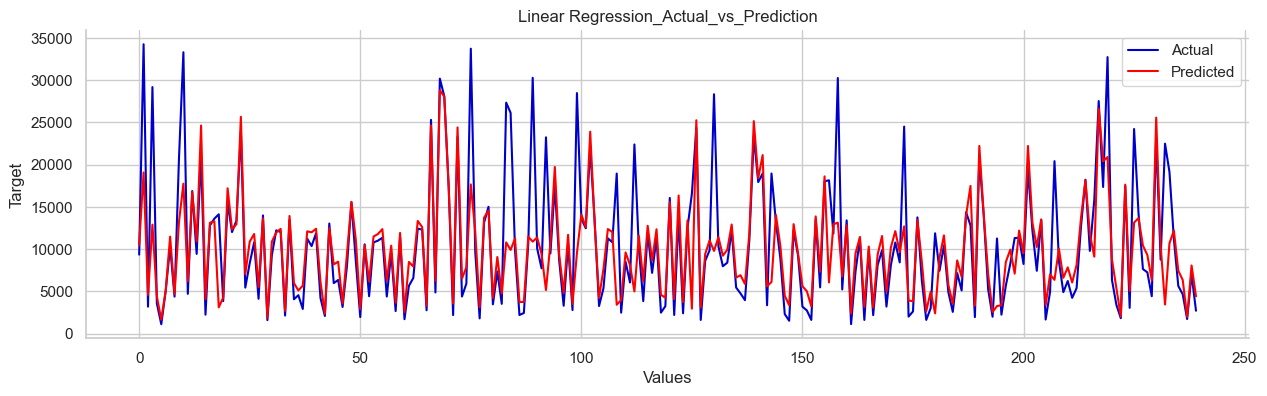

In [241]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, Y_train)

# Evaluation
evaluation_fn(model, X_test, Y_test,'Linear Regression')

Mean Absolute Error (MAE): 3022.33
Mean Squared Error (MSE): 40899331.43
Root Mean Squared Error (RMSE): 6395.26
R-squared (R²): 0.29


C:\Users\kulsr\anaconda3\envs\xgboost\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


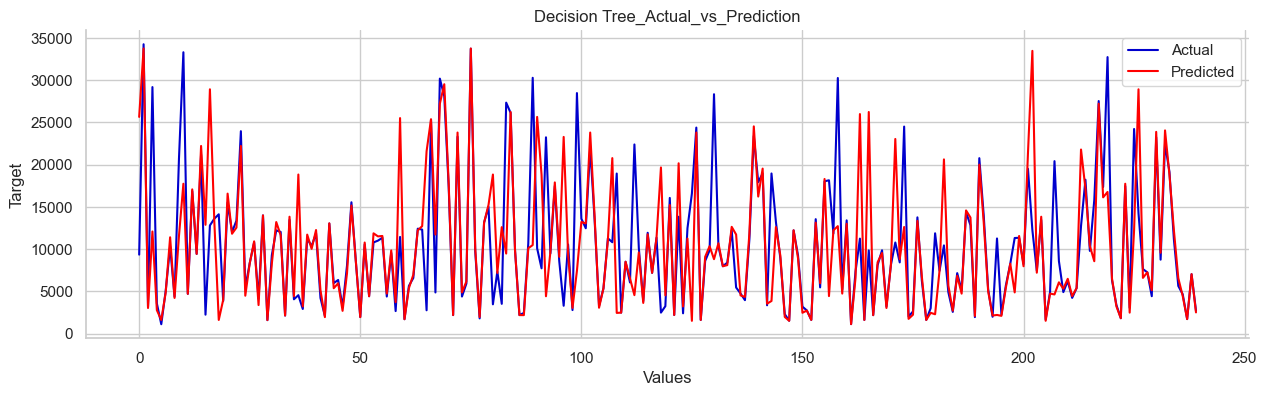

In [242]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Model
model = DecisionTreeRegressor(random_state=17)
model.fit(X_train, Y_train)

# Evaluation
evaluation_fn(model, X_test, Y_test,'Decision Tree')

Mean Absolute Error (MAE): 2605.46
Mean Squared Error (MSE): 25357325.39
Root Mean Squared Error (RMSE): 5035.61
R-squared (R²): 0.56


C:\Users\kulsr\anaconda3\envs\xgboost\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


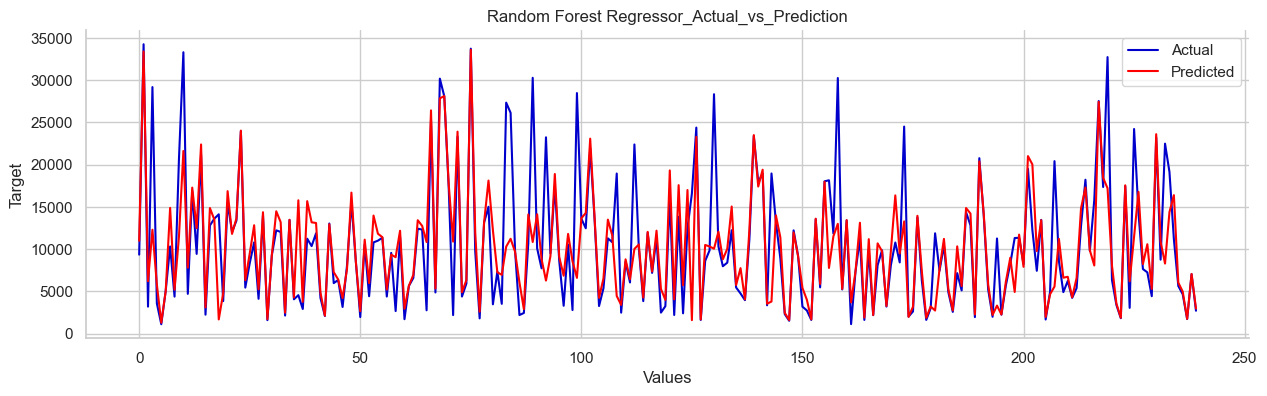

In [243]:
# Model
model = RandomForestRegressor(random_state=17)
model.fit(X_train, Y_train)

# Evaluation
evaluation_fn(model, X_test, Y_test,'Random Forest Regressor')

C:\Users\kulsr\anaconda3\envs\xgboost\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Mean Absolute Error (MAE): 2758.95
Mean Squared Error (MSE): 27480948.64
Root Mean Squared Error (RMSE): 5242.23
R-squared (R²): 0.53


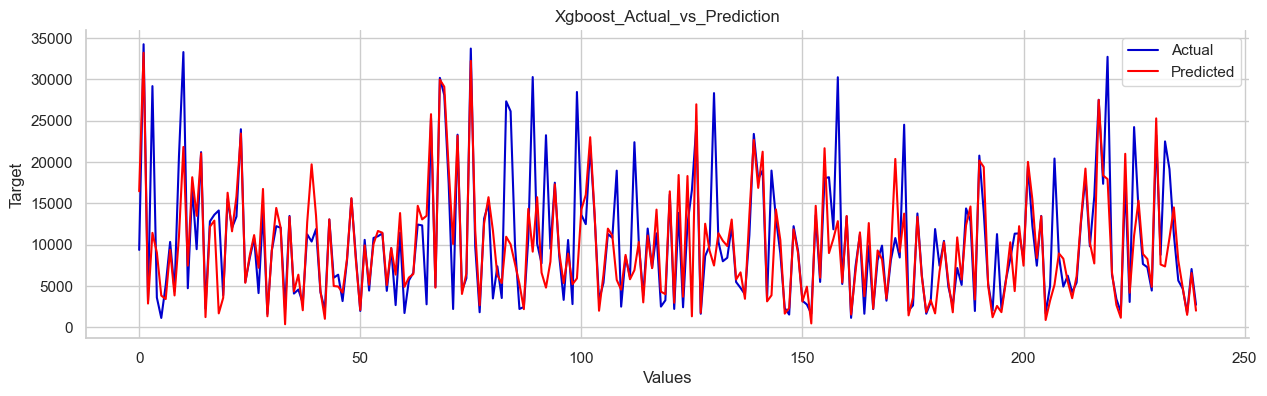

In [244]:
# Model
model = XGBRegressor(random_state=17)
model.fit(X_train, Y_train)

# Evaluation
evaluation_fn(model, X_test, Y_test,'Xgboost')